## DECISION TREE ALGORITHM


#### This alorithm is supervised learning alogorithm which is used for both regression and classification 


The general motive of using Decision Tree is to create a training model which can use to predict class(yes or no )or value of target variables by learning decision rules inferred from prior data(training data).

## CONTENTS

To take decision whether in which way we have to go for a result(for buying a house)

measures are used to select which varaible is used to root node are
- Informationgain , Entropy
- Gini index

### For programming we need to install conda install pydotplus

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

In [3]:
Loanpred_train =  pd.read_csv(r'R:\Spandu\EDA_HR_DATA\New folder\LoanPred_train.csv')
Loanpred_test = pd.read_csv(r'R:\Spandu\EDA_HR_DATA\New folder\LoanPred_test.csv ')


In [4]:
Loanpred_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
Loanpred_train.head();Loanpred_train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
Loanpred_train.describe()# it will give only the numerical data operations performed on numerical data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
Loanpred_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [8]:
Loanpred_train.shape

(614, 13)

In [9]:
Loanpred_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
Loanpred_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
Loanpred_train.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

Prepare a list with obeject column names 

In [12]:

object = [ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
for i in object:
    print(Loanpred_train[i].value_counts())


Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


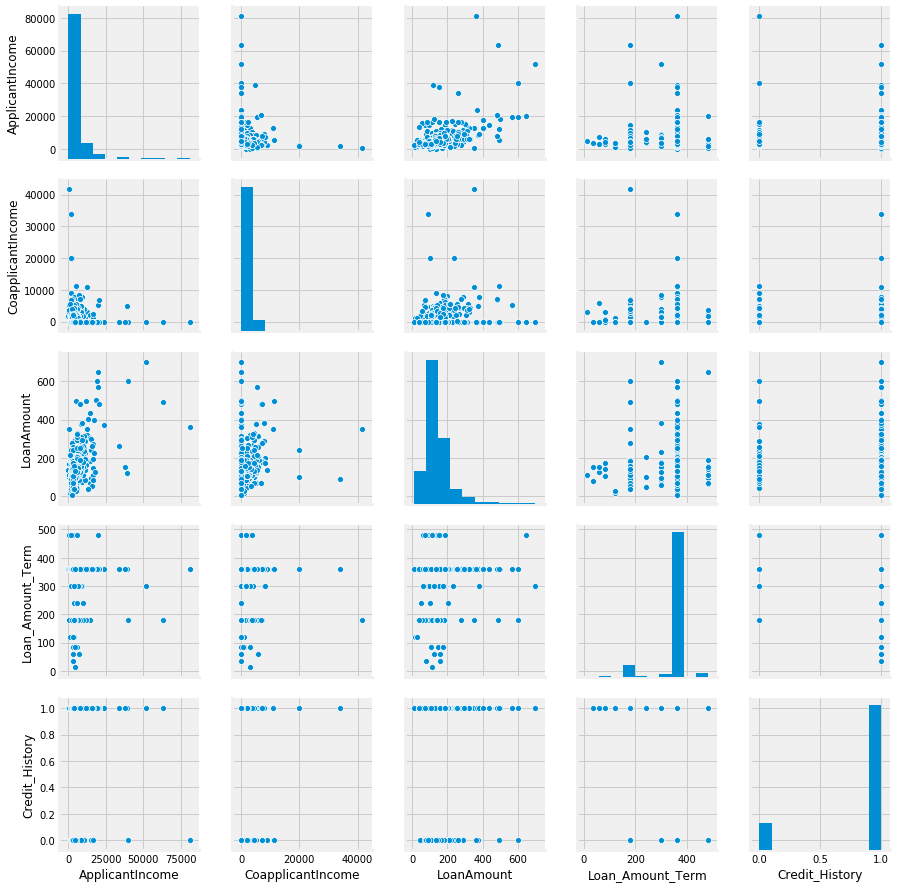

In [13]:

sns.pairplot(Loanpred_train)#it will show the numerical data relations in pairs

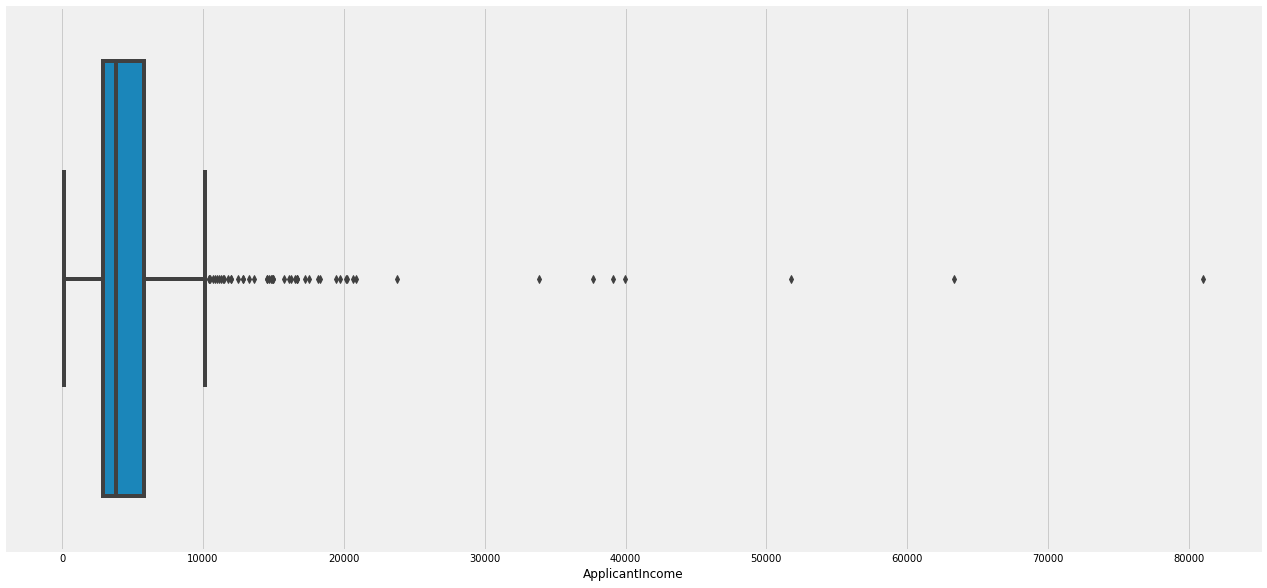

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'ApplicantIncome',data= Loanpred_train);

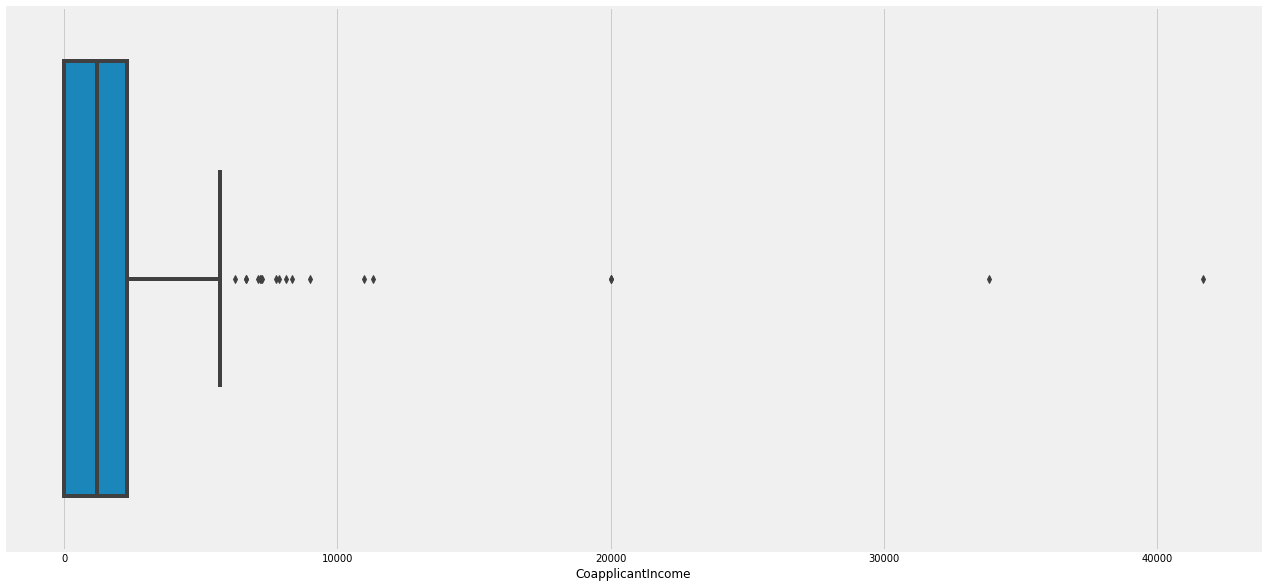

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'CoapplicantIncome',data= Loanpred_train);

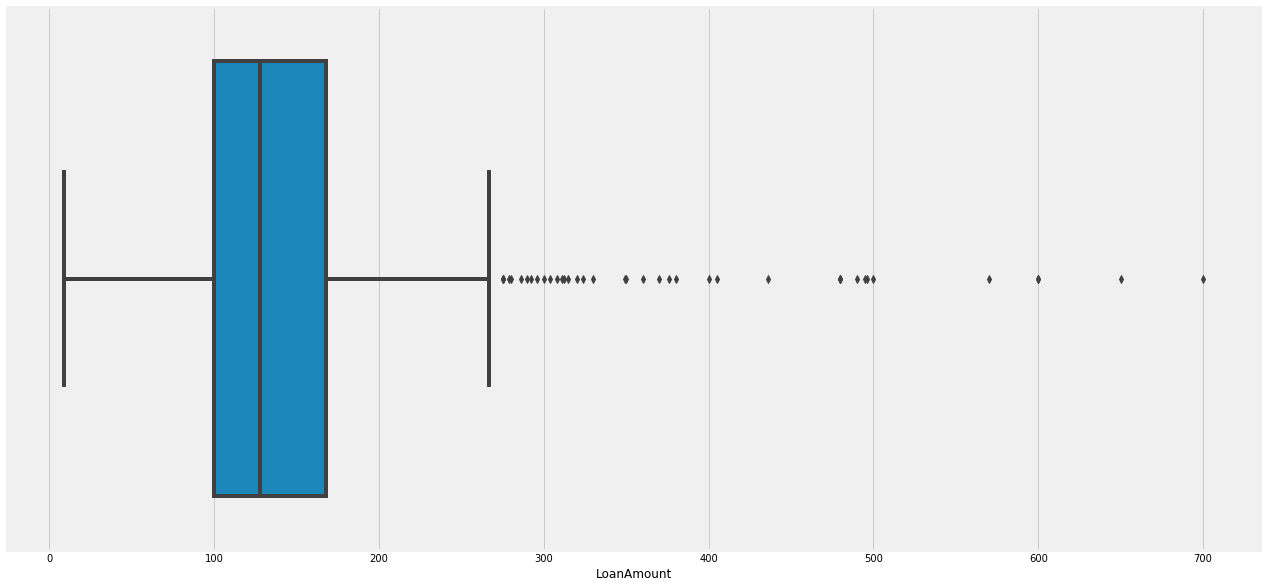

In [16]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'LoanAmount',data= Loanpred_train);

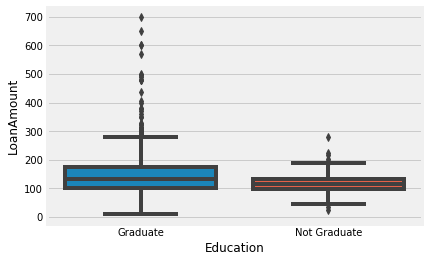

In [17]:
#plt.subplot(121)
sns.boxplot(x = Loanpred_train['Education'],y=Loanpred_train['LoanAmount'])


Lets analyse the few catogorical column

In [18]:
Loanpred_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [19]:
Loanpred_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [20]:
stack_bar = pd.crosstab(Loanpred_train.Credit_History,Loanpred_train.Loan_Status)#crosstab is used to show

In [21]:
stack_bar

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


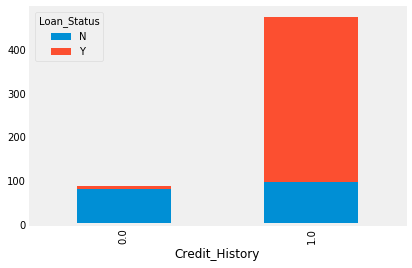

In [22]:
stack_bar.plot(kind = 'bar',stacked = True ,grid=False);#it showing the two catigorical column in singal graph


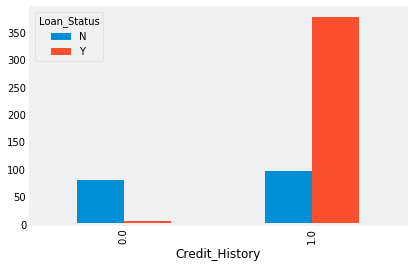

In [23]:
stack_bar.plot(kind = 'bar',stacked = False ,grid=False);#it showing the two catigorical column in singal graph


In [24]:
stack_bar_gender = pd.crosstab([Loanpred_train['Credit_History'],Loanpred_train['Gender']],Loanpred_train['Loan_Status'])

In [25]:
stack_bar_gender

Loan_Status             N    Y
Credit_History Gender         
0.0            Female  16    1
               Male    63    6
1.0            Female  20   64
               Male    75  307

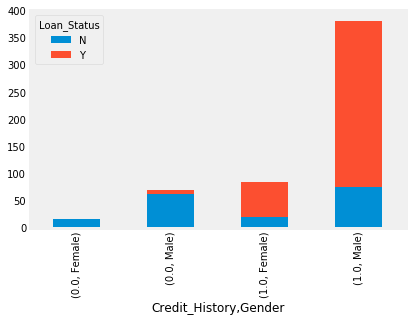

In [26]:
stack_bar_gender.plot(kind = 'bar',stacked = True ,grid=False);#it showing the two catigorical column in singal graph


In [27]:
Loanpred_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
Loanpred_train.LoanAmount.fillna(Loanpred_train.LoanAmount.mean(), inplace = True)

In [29]:
Loanpred_train.Gender.fillna(Loanpred_train.Gender.mode()[0], inplace = True)
Loanpred_train.Married.fillna(Loanpred_train.Married.mode()[0], inplace = True)
Loanpred_train.Dependents.fillna(Loanpred_train.Dependents.mode()[0], inplace = True)
Loanpred_train.Loan_Amount_Term.fillna(Loanpred_train.Loan_Amount_Term.mean(), inplace = True)
Loanpred_train.Credit_History.fillna(Loanpred_train.Credit_History.mode()[0], inplace = True)
Loanpred_train.Self_Employed.fillna(Loanpred_train.Self_Employed.mode()[0], inplace = True)

In [30]:
Loanpred_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [31]:
Loanpred_train['LoanAmount_log'] = np.log(Loanpred_train.LoanAmount)

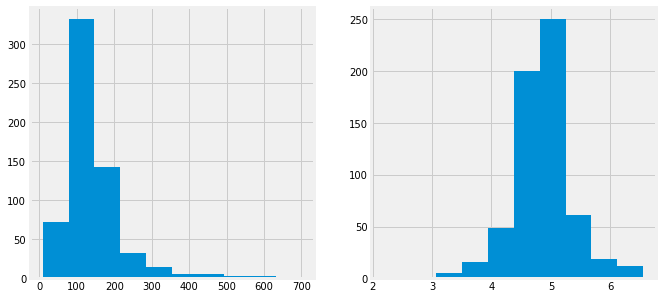

In [32]:
plt.figure(figsize=(10,5))
plt.subplot(121)
Loanpred_train.LoanAmount.hist()

plt.subplot(122)
Loanpred_train['LoanAmount_log'].hist();   # after applying log skewness is removed

In [33]:
Loanpred_train.TotalIncome = Loanpred_train.ApplicantIncome+ Loanpred_train.CoapplicantIncome
Loanpred_train.TotalIncome_log = np.log(Loanpred_train.TotalIncome)
Loanpred_train.LoanAmount_log_log = np.log(Loanpred_train.LoanAmount_log)


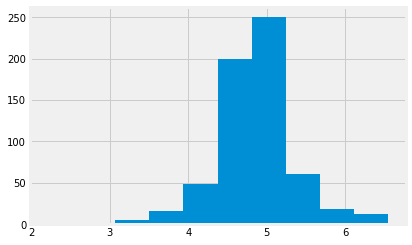

In [34]:
Loanpred_train.LoanAmount_log.hist()

In [35]:
Loanpred_train.LoanAmount_log

0      4.986426
1      4.852030
2      4.189655
3      4.787492
4      4.948760
5      5.587249
6      4.553877
7      5.062595
8      5.123964
9      5.855072
10     4.248495
11     4.691348
12     5.298317
13     4.736198
14     2.833213
15     4.828314
16     4.605170
17     4.330733
18     4.890349
19     4.744932
20     4.644391
21     5.752573
22     4.753590
23     4.718499
24     5.017280
25     5.252273
26     4.804021
27     4.700480
28     3.555348
29     4.787492
         ...   
584    4.983607
585    5.147494
586    4.644391
587    4.248495
588    4.543295
589    4.663439
590    4.025352
591    5.323010
592    5.676754
593    4.955827
594    5.560682
595    4.700480
596    5.231109
597    4.477337
598    5.192957
599    5.257495
600    5.857933
601    5.043425
602    4.852030
603    5.147494
604    6.206576
605    4.986426
606    5.153292
607    5.056246
608    4.682131
609    4.262680
610    3.688879
611    5.533389
612    5.231109
613    4.890349
Name: LoanAmount_log, Le

# Convert all our categorical cols into numeric cols using label encoder()

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
Loanpred_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

In [38]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area', 'Loan_Status']
le = LabelEncoder()

for i in cat_cols:
    Loanpred_train[i] = le.fit_transform(Loanpred_train[i])
    
Loanpred_train.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
dtype: object

# Building desicion tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

feature_cols = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
Y = Loanpred_train.Loan_Status
X = Loanpred_train[feature_cols]

In [40]:
X
Y

,Credit_History,Loan_Amount_Term,LoanAmount_log
0,1.0,360.0,4.986426
1,1.0,360.0,4.852030
2,1.0,360.0,4.189655
3,1.0,360.0,4.787492
4,1.0,360.0,4.948760
5,1.0,360.0,5.587249
6,1.0,360.0,4.553877
7,0.0,360.0,5.062595
8,1.0,360.0,5.123964
9,1.0,360.0,5.855072


0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
      ..
584    0
585    0
586    1
587    1
588    1
589    0
590    1
591    0
592    1
593    1
594    1
595    1
596    0
597    0
598    1
599    1
600    0
601    1
602    1
603    1
604    1
605    0
606    1
607    1
608    1
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [41]:
DT_model = DecisionTreeClassifier()

#DT_model.fit(X,Y)

In [42]:
DT_model.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
DT_model.pred_train = DT_model.predict(X)

DT_model.pred_train

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,

In [44]:
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report,accuracy_score

print(metrics.accuracy_score(Y,DT_model.pred_train))

feature_cols1  = ['Credit_History','Loan_Amount_Term','LoanAmount_log','Gender', 'Married','Education']
X1 = Loanpred_train[feature_cols1]
Y1 = Loanpred_train.Loan_Status

X1;
Y1

DT_model2 = DecisionTreeClassifier()

DT_model2.fit(X1,Y1)

DT_model2.pred_train = DT_model2.predict(X1)

DT_model.pred_train

print(accuracy_score(Y1,DT_model2.pred_train))

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import collections

!pip install pydotplus

0.8941368078175895


,Credit_History,Loan_Amount_Term,LoanAmount_log,Gender,Married,Education
0,1.0,360.0,4.986426,1,0,0
1,1.0,360.0,4.852030,1,1,0
2,1.0,360.0,4.189655,1,1,0
3,1.0,360.0,4.787492,1,1,1
4,1.0,360.0,4.948760,1,0,0
5,1.0,360.0,5.587249,1,1,0
6,1.0,360.0,4.553877,1,1,1
7,0.0,360.0,5.062595,1,1,0
8,1.0,360.0,5.123964,1,1,0
9,1.0,360.0,5.855072,1,1,0


0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
      ..
584    0
585    0
586    1
587    1
588    1
589    0
590    1
591    0
592    1
593    1
594    1
595    1
596    0
597    0
598    1
599    1
600    0
601    1
602    1
603    1
604    1
605    0
606    1
607    1
608    1
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,

0.9576547231270358


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [45]:
dot_data = export_graphviz(DT_model2, out_file = None, feature_names=feature_cols1, filled=True, rounded=True)


#Draw graph

graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('turquoise','orange')

In [46]:
import imp
imp.find_module('graphviz')

(None, 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\graphviz', ('', '', 5))

In [47]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import collections
import graphviz

In [48]:
import subprocess


In [49]:
export_graphviz(DT_model2,out_file='tree1.dot',feature_names=feature_cols1,class_names='Loan_Status',filled = True,proportion=False,precision=2,rounded=True)

In [51]:
subprocess.call(['dot','-Tpng','tree.dot','-o','tree.png','-Gdpi=600'],shell=True)

2

In [54]:
import os
os.getcwd()

'C:\\Users\\naveen\\sequence\\Machine Learning'

In [55]:
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'tree.png'